### TxTrack  
####  Texas High-Frequency Radar Particle Tracking  

Three Components of TxTrack
> 1. External Data Access  
> 2. Computing Kernel  
> 3. Web Visualization

Requirements:
> Flask + Flask-compress   
> Xarray + SciPY + Dask + netCDF4 
> Numpy
>  


In [18]:
!git clone https://github.com/cyhsu/leaflet.timedimention.trajectory.git

Cloning into 'leaflet.timedimention.trajectory'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 645 (delta 8), reused 1 (delta 0), pack-reused 621
Receiving objects: 100% (645/645), 68.94 MiB | 31.68 MiB/s, done.
Resolving deltas: 100% (317/317), done.


In [19]:
cd leaflet\.timedimention\.trajectory/


/content/leaflet.timedimention.trajectory/leaflet.timedimention.trajectory


In [20]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
proj-data is already the newest version (4.9.3-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [21]:
pip install -r requirements.txt

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
from src.api.fetch import fetch


In [39]:
start_time = '2019-07-01'
end_time  = '2019-07-03'
cls = fetch(-96.88, 27.21,start_time,end_time)
json01 = cls.json()[0]
print(json01.keys())

			 Retrieve Dataset from UCSD HFRadar threddsURL

			 Load the entire dataset
dict_keys(['type', 'geometry', 'properties'])


In [40]:
lon,lat = np.squeeze(json01['geometry']['coordinates']).T
print(lat)

[27.21       27.21468999 27.21576721 27.21789983 27.22236307 27.22942984
 27.23847122 27.24696005 27.25455412 27.2610399  27.26846155 27.2760597
 27.28178154 27.28680982 27.29221566 27.29616712 27.29959685 27.30401228
 27.3101562  27.31629279 27.32118437 27.32530829 27.32816677 27.32999705
 27.33282766 27.33499868 27.33705026 27.34063004 27.34473867 27.35021589
 27.35570876 27.36068775 27.36530818 27.36959889 27.37116967 27.37141205
 27.37524451 27.38200946 27.3881128  27.38379728 27.37707123 27.3740608
 27.37670872 27.3776706  27.37844516 27.38036834 27.38139756 27.38246326
 27.38485236 27.38797884 27.39222959 27.39475831 27.39765625 27.40698657
 27.41934687 27.43178863 27.44326952 27.45237805 27.46495221 27.47847546
 27.4898776  27.49703429 27.50874609 27.52498715 27.53784321 27.55983766
 27.55993963 27.56692287 27.57850904 27.57850904 27.58627438 27.5928559 ]


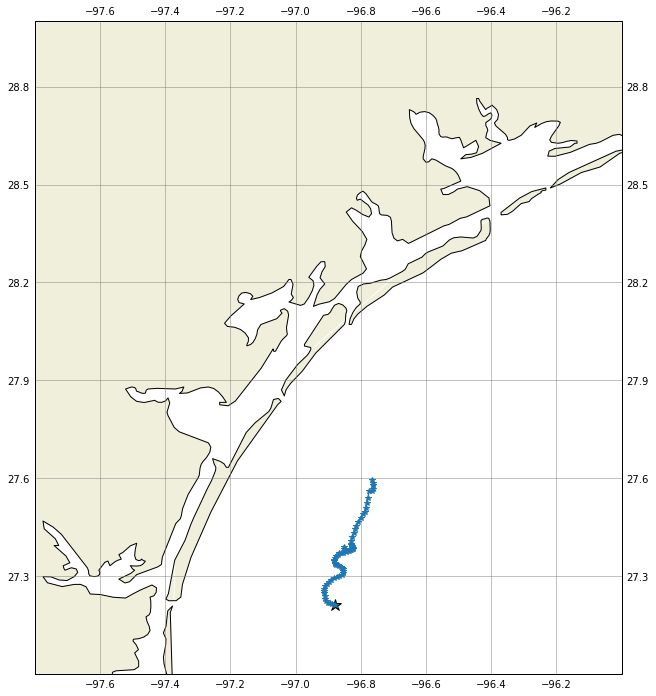

In [43]:
fig, axes = plt.subplots(ncols=1,nrows=1,
                         figsize=(15,12),
                         subplot_kw=dict(projection=ccrs.PlateCarree()))
extent = [-99.0, -90.0, 25.0, 30.0]
# axes.set_extent(extent)
axes.add_feature(cf.LAND.with_scale('10m'))
# axes.add_feature(cf.OCEAN)  
axes.add_feature(cf.STATES, linestyle='-',lw=1.0,edgecolor='white')  
axes.add_feature(cf.BORDERS, linestyle='-', lw=2.5,edgecolor='white')  
axes.gridlines(color='gray',alpha=0.6,draw_labels=True) 
axes.coastlines(resolution='10m')
axes.set_ylim([27.0,29.0])
axes.set_xlim([-97.8,-96.0])
axes.plot(lon[0],lat[0],'k*',markersize=12)
axes.plot(lon,lat,'*-')
plt.show()